In [1]:
#Building a health recomnmendation model for Liver Patients

Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the dataset

In [3]:
#The data set contains 416 liver patient records and 167 non liver patient records 
#collected from North East of Andhra Pradesh, India.
#The "Dataset" column is a class label used to divide groups into liver patient (liver disease) 
#or not (no disease). This data set contains 441 male patient records and 142 female patient records.

In [74]:
data=pd.read_csv("indian_liver_patient.csv")
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [75]:
data.shape

(583, 11)

In [76]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Checking Null

In [77]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [78]:
#filling the null values
mean_ratio = data['Albumin_and_Globulin_Ratio'].mean()
mean_ratio

0.9470639032815197

In [79]:
data = data.fillna(mean_ratio)

In [80]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [81]:
## changing the column name

data.rename(columns={'Dataset': 'Diagnosis'}, inplace=True)


Label Encoding

In [82]:

data['Diagnosis'] = data['Diagnosis'].apply(lambda x:1 if x==1 else 0)

In [83]:
data['Diagnosis'].value_counts()

1    416
0    167
Name: Diagnosis, dtype: int64

In [84]:
data['Gender'] = data['Gender'].apply(lambda x:1 if x=='Male' else 0)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Exploratory Data Analysis

In [85]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Diagnosis                   583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


Text(0, 0.5, 'Count')

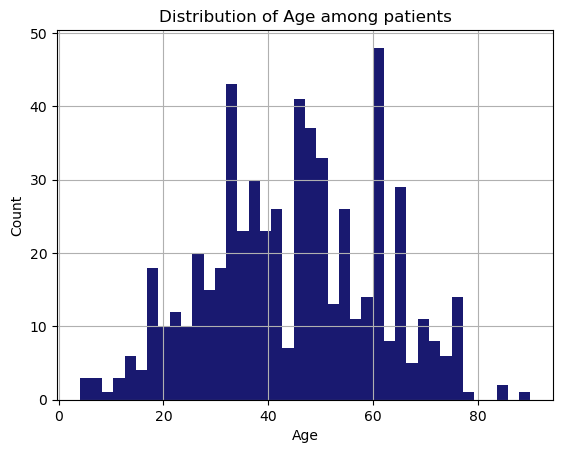

In [87]:
data['Age'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age")
plt.ylabel('Count')

Text(0.5, 0, 'Gender')

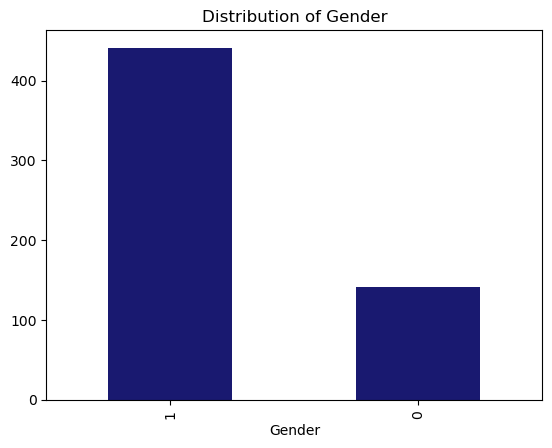

In [88]:
data['Gender'].value_counts().plot.bar(color='midnightblue')
plt.title("Distribution of Gender")
plt.xlabel("Gender")

Text(0.5, 1.0, 'Diagnosis of patients')

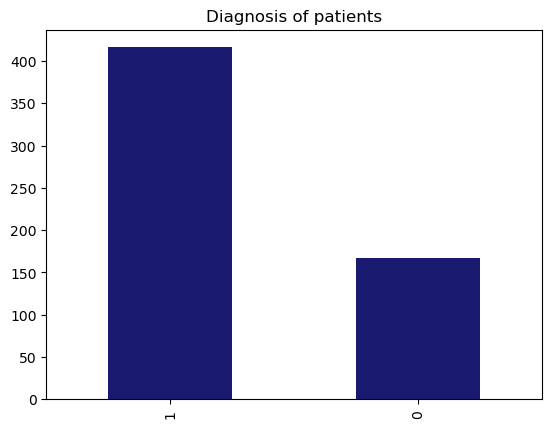

In [89]:
#(1 - Liver disease | 0 - No Liver disease')

data['Diagnosis'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients')


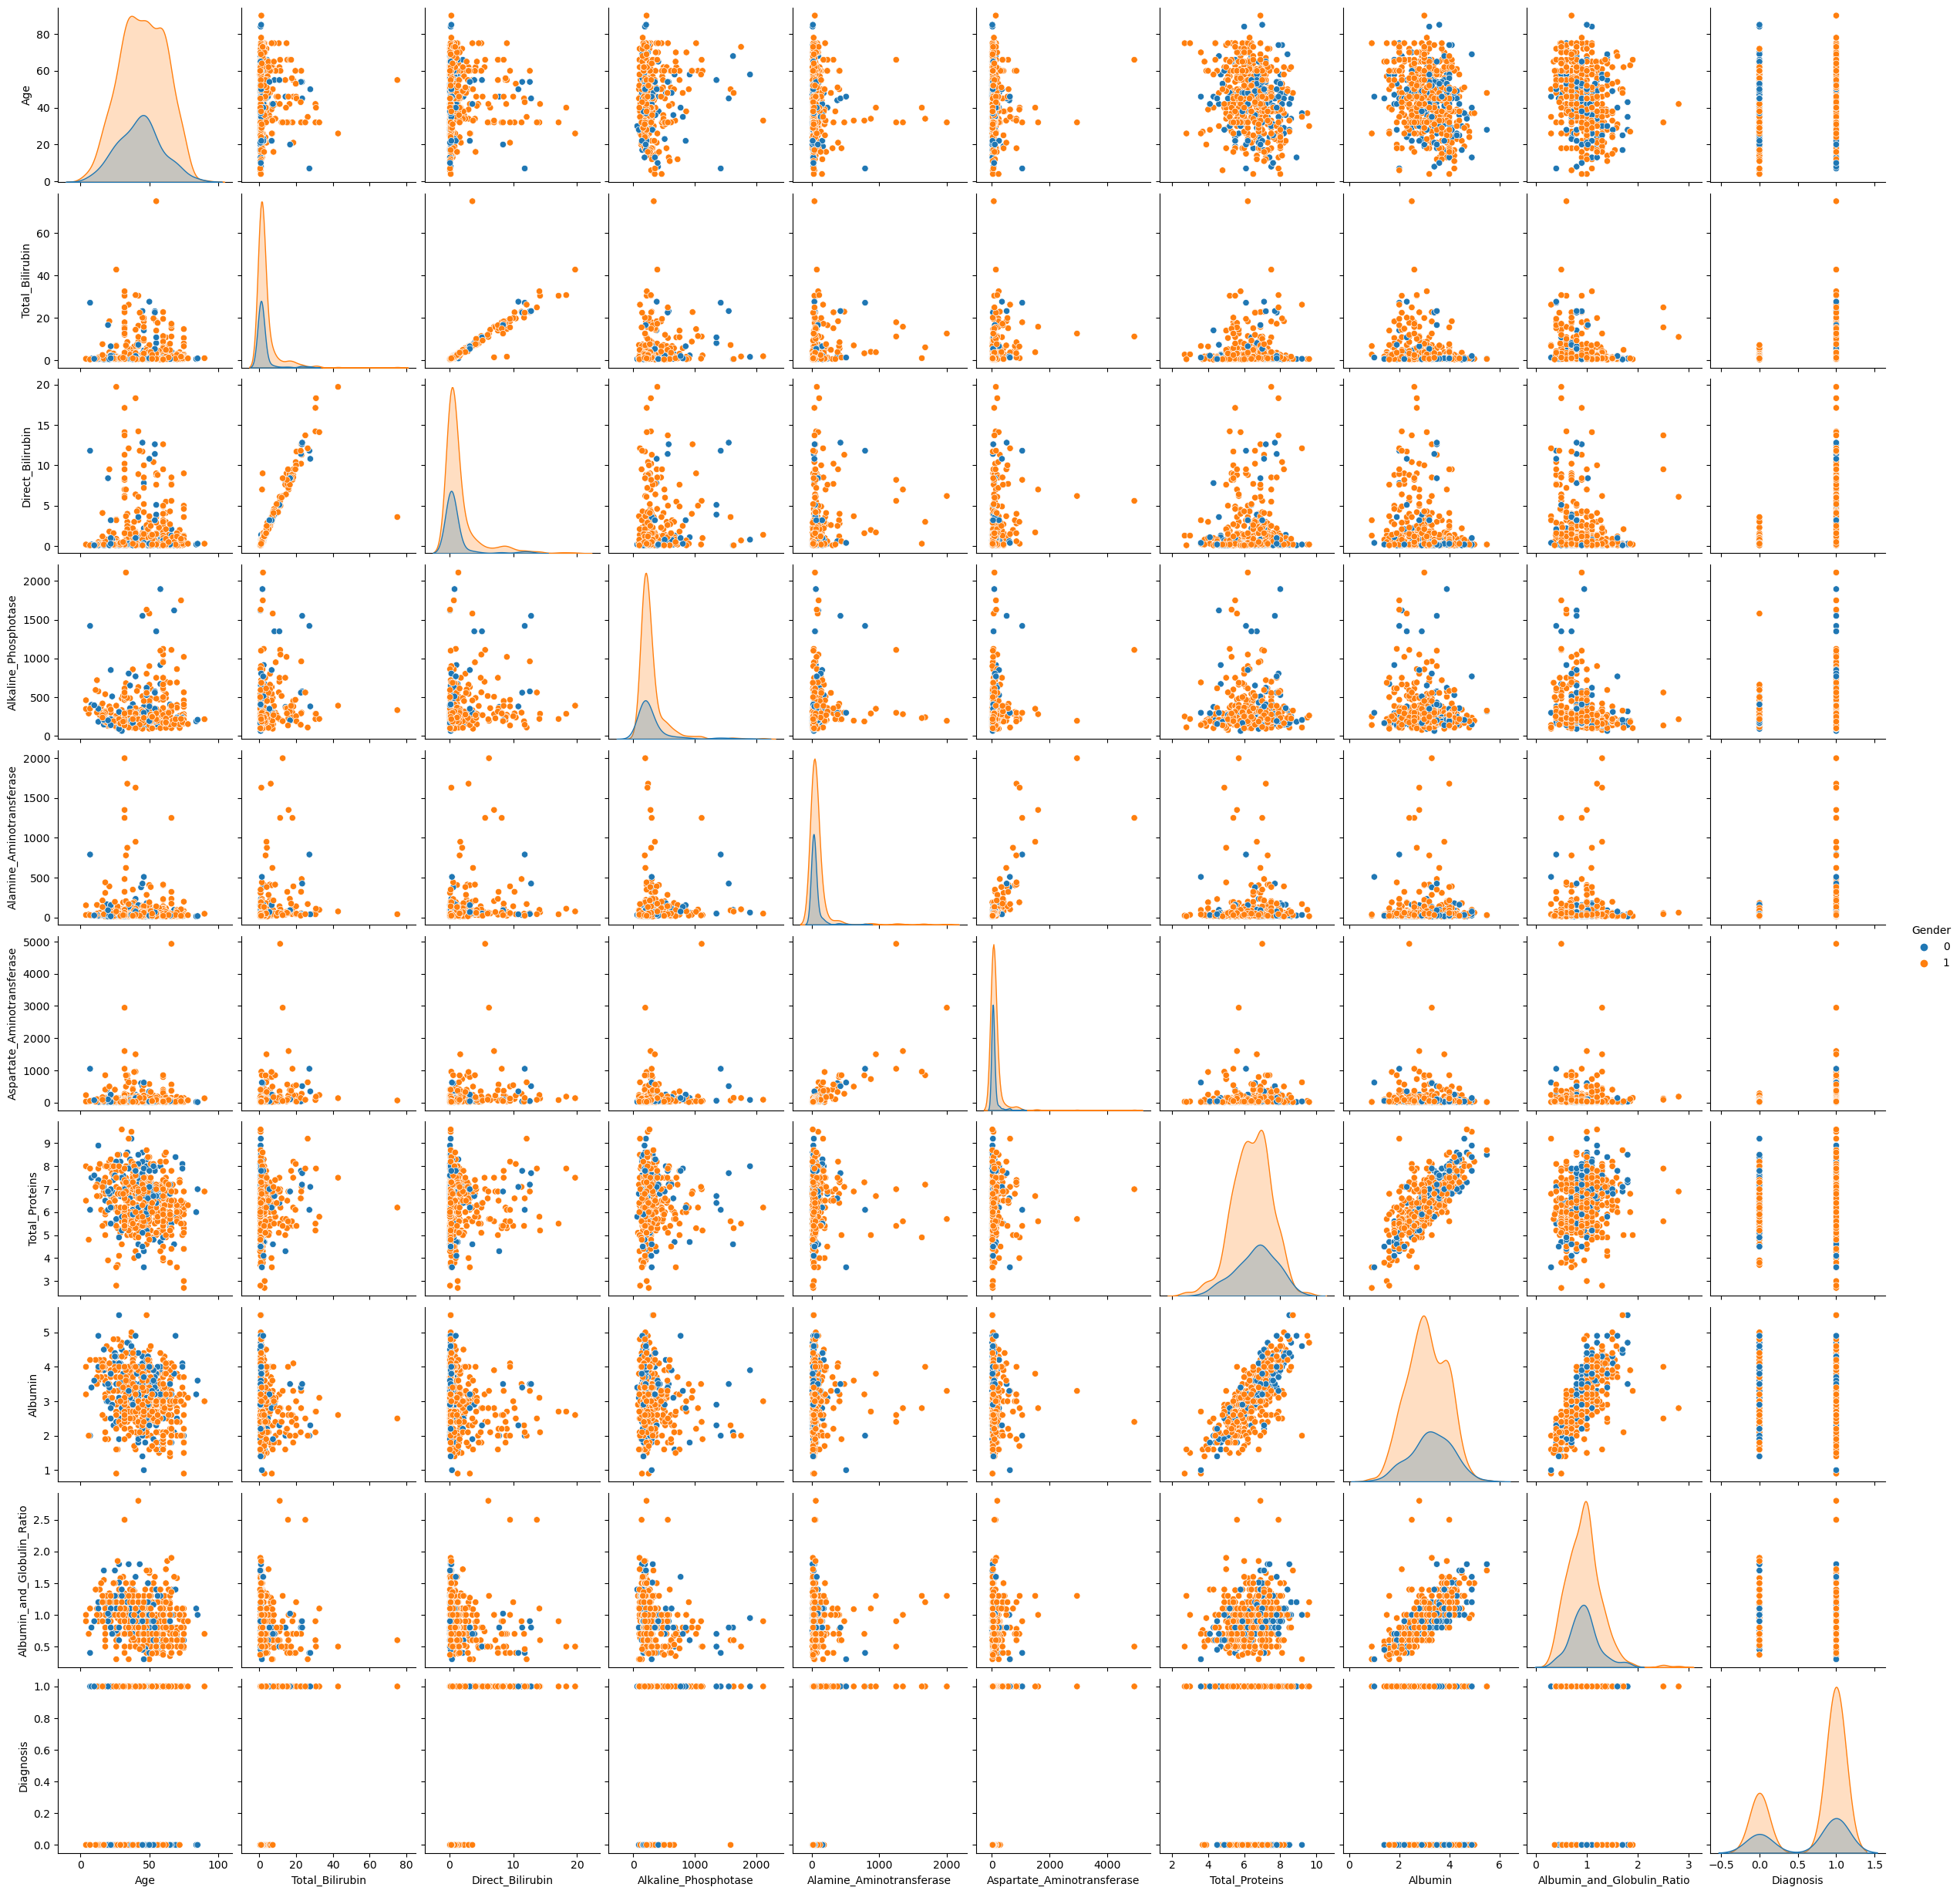

In [54]:
sns.pairplot(data,hue='Gender')

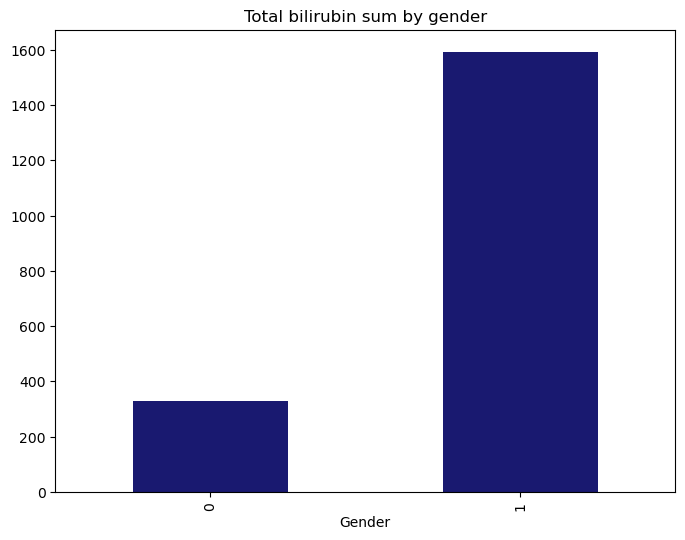

In [90]:
plt.figure(figsize = (8,6))
data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='midnightblue')
plt.title('Total bilirubin sum by gender');

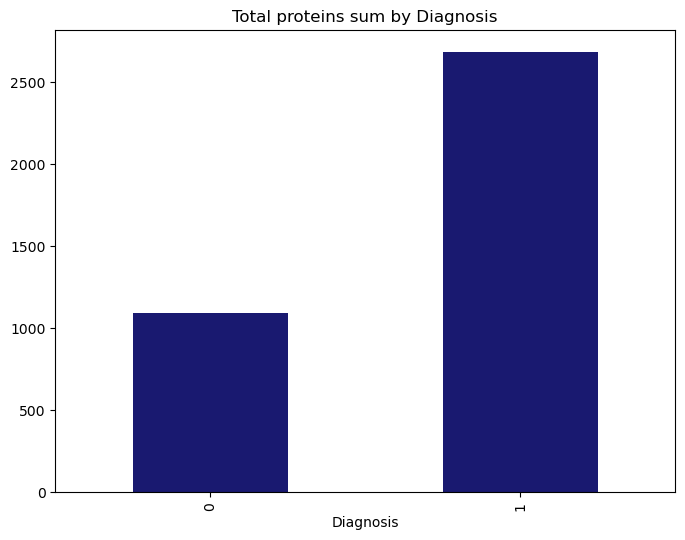

In [93]:
plt.figure(figsize = (8,6))
data.groupby('Diagnosis').sum()['Total_Protiens'].plot.bar(color='midnightblue')
plt.title('Total proteins sum by Diagnosis');

In [94]:
corr=data.corr()
corr

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319


<Axes: >

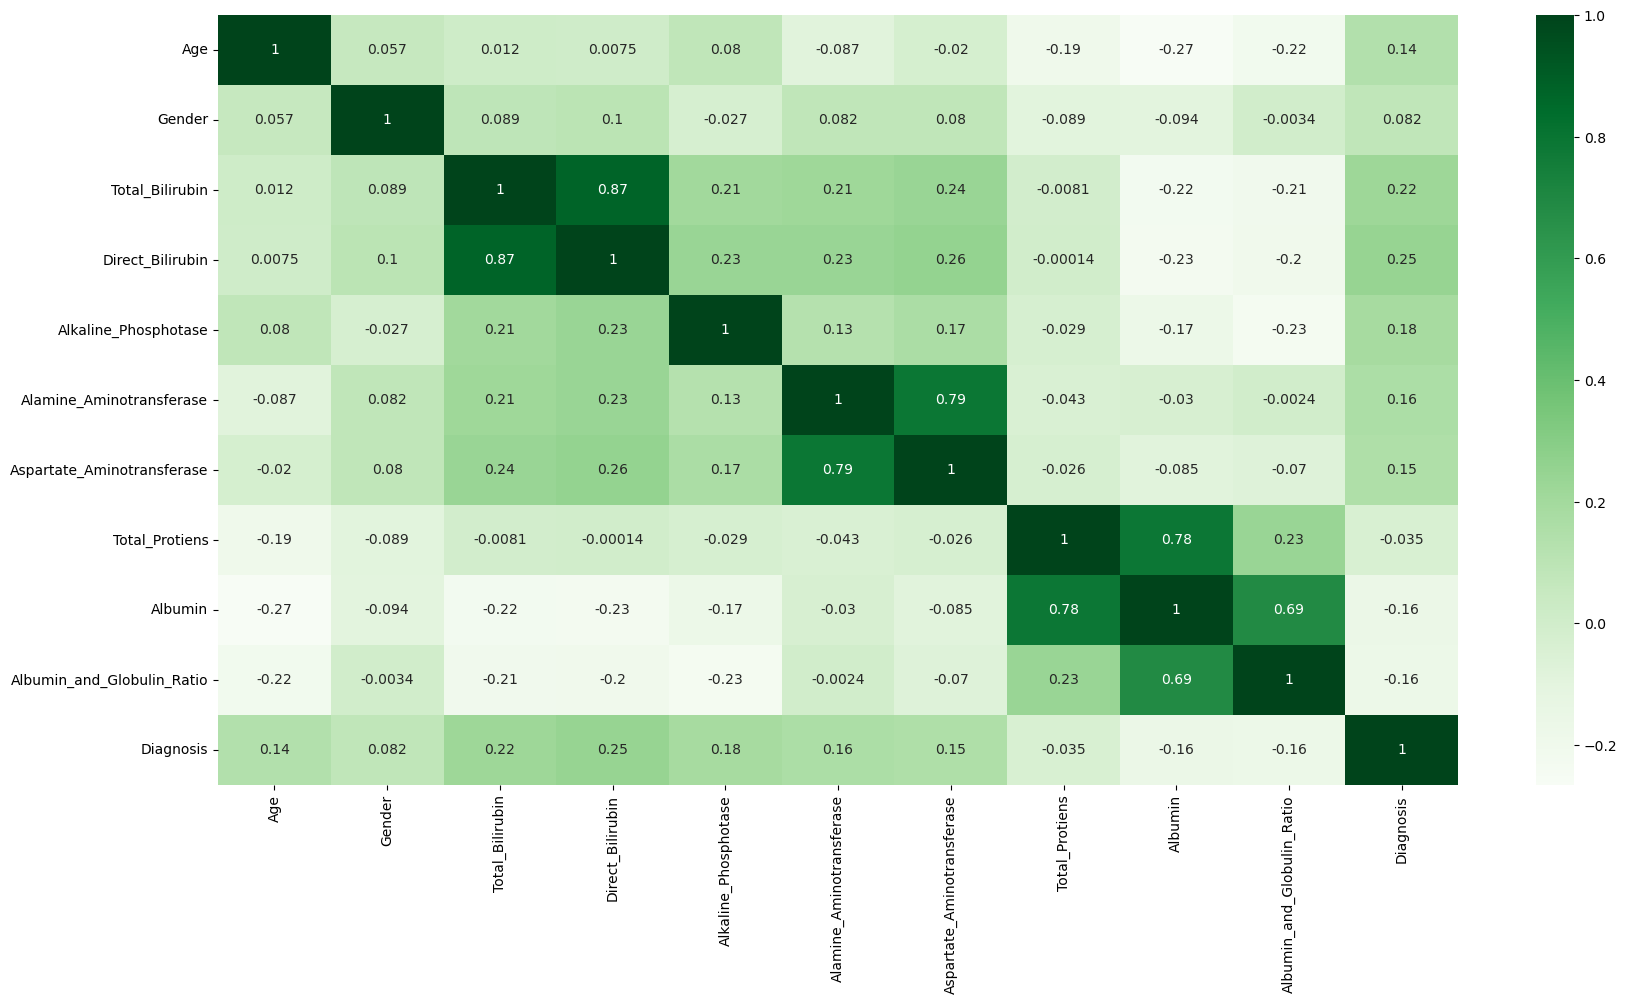

In [95]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [96]:
# defining x and y vairable
x=data.drop('Diagnosis',axis=1)
y=data['Diagnosis']

In [97]:
x.shape

(583, 10)

In [98]:
y.shape

(583,)

In [99]:
y.value_counts()

1    416
0    167
Name: Diagnosis, dtype: int64

Data Balancing

In [100]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=0,contamination=0.05)
clean=iso.fit_predict(x,y)

In [101]:
x=x[clean==1]
y=y[clean==1]

In [102]:
x.shape

(553, 10)

In [103]:
y.value_counts()

1    386
0    167
Name: Diagnosis, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

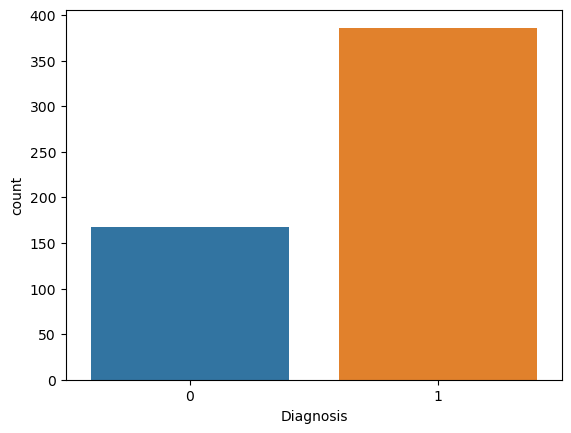

In [105]:
sns.countplot(x=y)

In [106]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         553 non-null    int64  
 1   Gender                      553 non-null    int64  
 2   Total_Bilirubin             553 non-null    float64
 3   Direct_Bilirubin            553 non-null    float64
 4   Alkaline_Phosphotase        553 non-null    int64  
 5   Alamine_Aminotransferase    553 non-null    int64  
 6   Aspartate_Aminotransferase  553 non-null    int64  
 7   Total_Protiens              553 non-null    float64
 8   Albumin                     553 non-null    float64
 9   Albumin_and_Globulin_Ratio  553 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 47.5 KB


In [108]:
#Dimensionality Reduction
x_new=x[['Age','Total_Bilirubin','Albumin','Total_Protiens']]
x_new

,Age,Total_Bilirubin,Albumin,Total_Protiens
0,65,0.7,3.3,6.8
1,62,10.9,3.2,7.5
2,62,7.3,3.3,7.0
3,58,1.0,3.4,6.8
4,72,3.9,2.4,7.3
...,...,...,...,...
578,60,0.5,1.6,5.9
579,40,0.6,3.2,6.0
580,52,0.8,3.2,6.4
581,31,1.3,3.4,6.8


In [109]:
x_new.shape

(553, 4)

In [110]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_new)

In [111]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,553.000000,553.000000,553.000000,553.000000
mean,0.477333,0.028725,0.489386,0.547239
std,0.189004,0.063879,0.172619,0.156017
min,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.005362,0.369565,0.449275
50%,0.476744,0.008043,0.478261,0.550725
75%,0.627907,0.024129,0.630435,0.652174
max,1.000000,1.000000,1.000000,1.000000


In [141]:
#MODEL BUILDING-LOGISTIC REGRESSION
#1.splitting data into train test
#2.logistic regression model
#3.confusion matrix analysis
#4.classification report

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x_new,y,test_size=0.20,random_state=16
)

In [142]:
x_train.shape

(442, 4)

In [143]:
x_test.shape

(111, 4)

In [144]:
y_train.shape

(442,)

In [145]:
y_test.shape

(111,)

Building logistic Regression Model

In [146]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=16)
logreg.fit(x_train,y_train)


LogisticRegression(random_state=16)

In [147]:
y_pred=logreg.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1], dtype=int64)

In [148]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.7477477477477478

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.15      0.22        27
           1       0.77      0.94      0.85        84

    accuracy                           0.75       111
   macro avg       0.61      0.54      0.54       111
weighted avg       0.69      0.75      0.70       111



SVC Classifier

In [150]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.7567567567567568

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.76      1.00      0.86        84

    accuracy                           0.76       111
   macro avg       0.38      0.50      0.43       111
weighted avg       0.57      0.76      0.65       111



C:\Users\shree\Downloads\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shree\Downloads\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shree\Downloads\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7477477477477478

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46        27
           1       0.83      0.85      0.84        84

    accuracy                           0.75       111
   macro avg       0.65      0.64      0.65       111
weighted avg       0.74      0.75      0.74       111



KNN Classifier

In [154]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)

neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)
accuracy_score(y_test, y_pred)

0.6756756756756757

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.74      0.53        27
           1       0.89      0.65      0.75        84

    accuracy                           0.68       111
   macro avg       0.65      0.70      0.64       111
weighted avg       0.77      0.68      0.70       111



In [161]:
x_new.describe()

,Age,Total_Bilirubin,Albumin,Total_Protiens
count,553.000000,553.000000,553.000000,553.000000
mean,45.050633,2.542857,3.151175,6.475949
std,16.254352,4.765359,0.794047,1.076520
min,4.000000,0.400000,0.900000,2.700000
25%,33.000000,0.800000,2.600000,5.800000
50%,45.000000,1.000000,3.100000,6.500000
75%,58.000000,2.200000,3.800000,7.200000
max,90.000000,75.000000,5.500000,9.600000


Inference

In [162]:
pred=pd.DataFrame({
    'Age':[60,34,23,57],
    'Total_Bilirubin':[0.4,0.5,2.3,3.4],
    'Albumin':[2.5,6.7,4.5,7.6],
    'Total_Protiens':[3.5,5.6,7.2,7.8]
})

In [167]:
pred

,Age,Total_Bilirubin,Albumin,Total_Protiens
0,60,0.4,2.5,3.5
1,34,0.5,6.7,5.6
2,23,2.3,4.5,7.2
3,57,3.4,7.6,7.8


In [168]:
clf.predict(pred)

array([1, 1, 0, 1], dtype=int64)

In [169]:
result=pd.DataFrame({
    'actual data':y_test,
    'predicted data':y_pred
})
result

,actual data,predicted data
200,1,0
179,1,1
2,1,1
465,0,0
339,1,1
...,...,...
523,1,1
541,0,0
251,1,1
168,1,1


Deployment

In [170]:
import joblib

In [171]:
joblib.dump(clf,'clf.model')

['clf.model']

In [172]:
joblib.dump(scaler,'scaler.model')

['scaler.model']